<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-BlackPuma075/blob/main/Oct6_7/Tarea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
np.loadtxt?

In [7]:
file = '/content/drive/MyDrive/Machine_Learning/olympic100m_men.txt'
dt = np.loadtxt(file, delimiter = ',')

In [8]:
dt

array([[1896.  ,   12.  ],
       [1900.  ,   11.  ],
       [1904.  ,   11.  ],
       [1906.  ,   11.2 ],
       [1908.  ,   10.8 ],
       [1912.  ,   10.8 ],
       [1920.  ,   10.8 ],
       [1924.  ,   10.6 ],
       [1928.  ,   10.8 ],
       [1932.  ,   10.3 ],
       [1936.  ,   10.3 ],
       [1948.  ,   10.3 ],
       [1952.  ,   10.4 ],
       [1956.  ,   10.5 ],
       [1960.  ,   10.2 ],
       [1964.  ,   10.  ],
       [1968.  ,    9.95],
       [1972.  ,   10.14],
       [1976.  ,   10.06],
       [1980.  ,   10.25],
       [1984.  ,    9.99],
       [1988.  ,    9.92],
       [1992.  ,    9.96],
       [1996.  ,    9.84],
       [2000.  ,    9.87],
       [2004.  ,    9.85],
       [2008.  ,    9.69]])

In [25]:
x_sn = dt[:, 0]
y = dt[:, 1]
x = (x_sn - min(x_sn))/4
x #normalización de x
y

array([12.  , 11.  , 11.  , 11.2 , 10.8 , 10.8 , 10.8 , 10.6 , 10.8 ,
       10.3 , 10.3 , 10.3 , 10.4 , 10.5 , 10.2 , 10.  ,  9.95, 10.14,
       10.06, 10.25,  9.99,  9.92,  9.96,  9.84,  9.87,  9.85,  9.69])

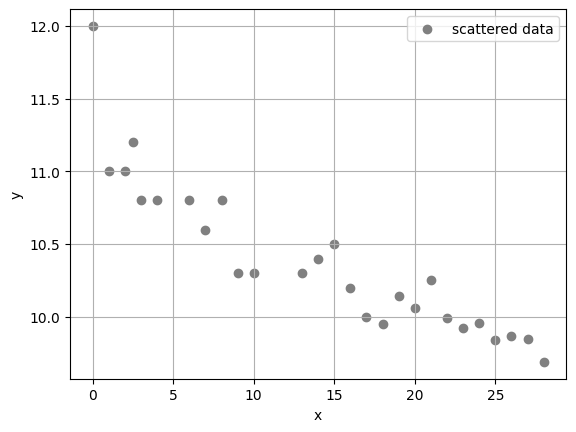

In [44]:
plt.scatter(x, y, color = 'gray', label = 'scattered data')
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.legend()

In [26]:
def w_mat(x,y):
  t = y
  X = np.vstack([np.ones_like(x),x]).T
  X_tX = np.matmul(X.T,X)
  invX_tX = np.linalg.inv(X_tX)
  X_t = np.matmul(X.T, t)
  w = np.matmul(invX_tX, X_t)
  return w

In [27]:
x_test = np.linspace(min(x), max(x), 27)
w_test = w_mat(x,y)
print(w_test)
w_test.shape

[11.14109659 -0.05332354]


(2,)

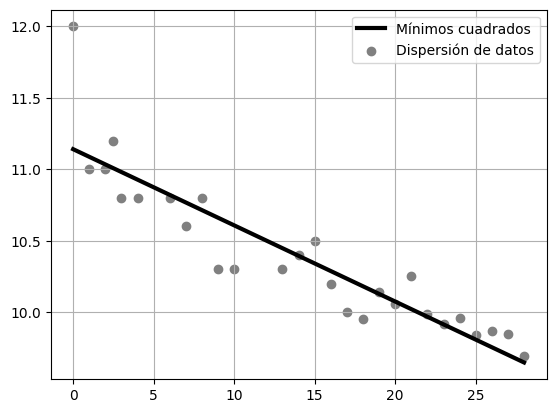

In [67]:
x_test = np.linspace(min(x), max(x), 27)
y_p = w_test[0]+w_test[1]*x_test
yerr =0.5 * np.random.rand(27)

plt.plot(x_test, y_p, color = 'black', label = 'Mínimos cuadrados', linewidth = 3)
plt.scatter(x, y, color = 'gray', label = 'Dispersión de datos')
plt.grid()
plt.legend()

**EMCEE**

$ln(L) = -\frac{1}{2}\sum_{n}\left[\frac{(y_{n}-mx_{n}-b)^{2}}{s^{2}_{n}}+\ln{(2\pi s^{2}_{n})}\right]$

$s^{2}_{n}=\sigma^{2}_{n}+f^{2}(mx_{n}+b)^{2}$

In [38]:
def log_likelihood(theta, x, y, yerr):
    m, b, log_f = theta
    model = m * x + b
    sigma2 = yerr**2 + model**2 * np.exp(2 * log_f)
    return -0.5 * np.sum((y - model) ** 2 / sigma2 + np.log(sigma2))

In [53]:
yy = np.sum(y_p)/len(y_p)
yy

10.394566994707759

In [75]:
theta = [w[0], w[1], np.log(yy)]

In [78]:
logL = log_likelihood(theta, x, y, yerr)

In [79]:
print("Maximum likelihood estimates:")
print("m = {0:.3f}".format(m_ml))
print("b = {0:.3f}".format(b_ml))
print("f = {0:.3f}".format(np.exp(log_f_ml)))

Maximum likelihood estimates:
m = -0.744
b = 1.391
f = 4.637


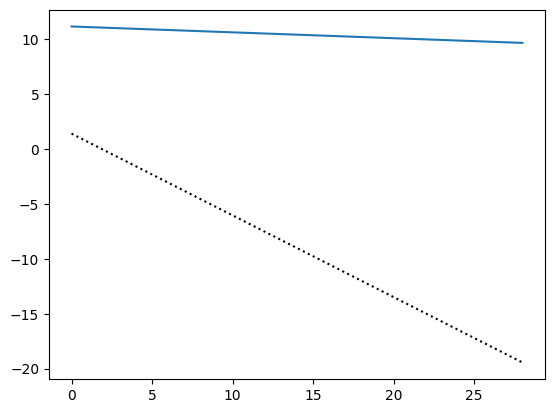

In [73]:
plt.plot(x, np.dot(np.vander(x, 2), [m_ml, b_ml]), ":k", label="ML")
plt.plot(x_test, y_p)